<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>🤗 Pipeline Overview</center></font></h1>
<h1><center>YouTube Video Transcription, Summarization, & Quiz Generation</center></h1>
<h3><center>Charlcye Mitchell, April 2024</center></h3>

# **Demo Notebook: The Pathway to Generative AI**
# **Using the OpenAI API and Hugging Face for Assorted Tasks**
### **YouTube Transcription, Transcript Summarization & Transcript Quiz Generation**

Now that we have obtained a brief introduction to how Generative AI and Large Language Models work under the hood, let us take the opportunity to obtain a quick demonstration of how these models can directly be called using APIs or using services built on top of APIs, for a variety of assorted tasks. This will give us an introduction to the API-based Model-as-a-Service nature of Proprietary AI before we dive deeper in further modules into calling and tuning open-source models, with more control into their functioning and their outputs.

We will focus on **three Natural Language tasks** in this notebook:

**1.** **YouTube Video Transcription**

**2.** **Transcript Summarization**

**3.** **Transcript Quiz Generation**

### **Caveat**

This is only a demonstration-oriented notebook meant to display the capabilities of Large Language Models.

Because the APIs being called will be OpenAI proprietary APIs, **running the cells in this notebook may not be possible unless you utilize your own OpenAI API key** for their GPT models.

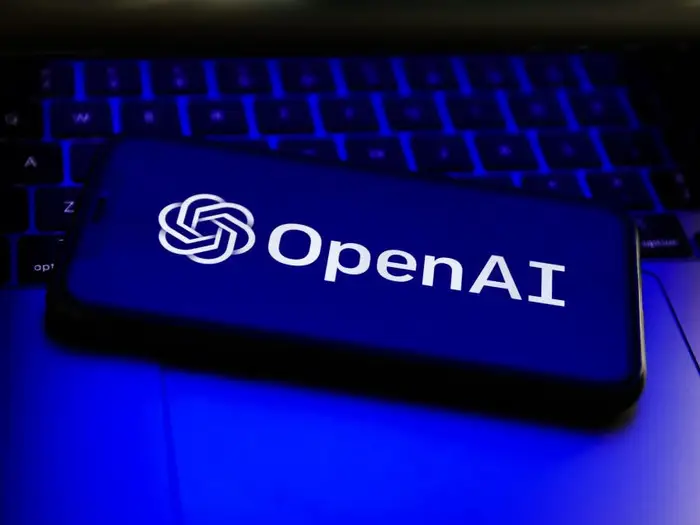

## **Installing and Importing the Libraries**

In [ ]:
# Install the following libraries
!pip install youtube_transcript_api
!pip install sentencepiece
!pip install openai
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompa

In [ ]:
# Importing dependencies
import re
from youtube_transcript_api import YouTubeTranscriptApi
import torch
import torchaudio
import openai
import textwrap
from transformers import pipeline
from IPython.display import HTML

## **Displaying the YouTube video used for the Transcription in this notebook**

In [ ]:
# Get the embed video code from youtube
video_embed = '<iframe width="950" height="500" src="https://www.youtube.com/embed/GOVaEBWE1j8?si=9zLjgjF-8fg_sBvW" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>'

# Show the video
HTML(video_embed)

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## **Task 1: YouTube Video Transcription - Obtaining the Transcript of the YouTube video link**

In [ ]:
# Specify the YouTube video URL
youtube_url = "https://www.youtube.com/watch?v=GOVaEBWE1j8"

# Extract the video ID from the URL using regular expressions
match = re.search(r"v=([A-Za-z0-9_-]+)", youtube_url)

# If the url has the ID
if match:
    # Get only the ID - group mentioned in the regex string inside "()"
    video_id = match.group(1)
else:
    raise ValueError("Invalid YouTube URL")

# Get the transcript from YouTube video's transcript by sending a request to the API
transcript = YouTubeTranscriptApi.get_transcript(video_id)

# Print the transcript
transcript

[{'text': '[Music]', 'start': 0.0, 'duration': 2.979},
 {'text': "let's start as the name suggests this",
  'start': 3.08,
  'duration': 5.74},
 {'text': 'algorithm is called linear regression',
  'start': 7.049,
  'duration': 5.641},
 {'text': "and the reason why it's called linear",
  'start': 8.82,
  'duration': 5.609},
 {'text': "regression as the name suggests is it's",
  'start': 12.69,
  'duration': 5.849},
 {'text': 'based on the concept of a line a line a',
  'start': 14.429,
  'duration': 6.421},
 {'text': 'plane a hyperplane we call it by these',
  'start': 18.539,
  'duration': 6.961},
 {'text': 'names so to begin with I need to ask you',
  'start': 20.85,
  'duration': 6.269},
 {'text': 'whether you know how a line is', 'start': 25.5, 'duration': 6.77},
 {'text': 'represented line line in mathematics are',
  'start': 27.119,
  'duration': 9.301},
 {'text': 'you all comfortable with this all right',
  'start': 32.27,
  'duration': 10.0},
 {'text': "so let's start imagine I 

As we can see above, the function has returned a response comprising of a list of dictionaries that serve as metadata about the transcript, with 3 keys: `text`, `start` and `duration`.

Given we are primarily interested only in the **text** of the transcript, we shall get the values of the `text` key in the dictionaries iteratively and create the transcript as a final paragraph.

In [ ]:
# Concatenate the transcript into a single string
transcript_text = ""

# Iterate throught the list of dictionaries
for segment in transcript:
    # Get the text key's value and concatenate it with the transcript text
    transcript_text += segment["text"] + " "

# Print the transcript text
transcript_text

"[Music] let's start as the name suggests this algorithm is called linear regression and the reason why it's called linear regression as the name suggests is it's based on the concept of a line a line a plane a hyperplane we call it by these names so to begin with I need to ask you whether you know how a line is represented line line in mathematics are you all comfortable with this all right so let's start imagine I give you two dimensions this is X X is here one of your independent attributes we call it columns in our data frame right so I loaded a data from a table into my data frame and one of the columns in the data frame I call it X this is my independent variable the other column which I want to predict the target column I call it Y could be anything Y could be the miles per gallon and X could be the weight of the car the more the weight of the car the less the miles per gallon right so why is my dependent variable X is my independent variable imagine this X has four five six the

## **Task 2: Transcript Summarization - Summarizing the YouTube Transcript**

### **Summarization using the Hugging Face Pipeline**

In [ ]:
from transformers import pipeline, AutoTokenizer

# Instantiate the tokenizer and the summarization pipeline
tokenizer = AutoTokenizer.from_pretrained('stevhliu/my_awesome_billsum_model')
summarizer = pipeline("summarization", model='stevhliu/my_awesome_billsum_model', tokenizer=tokenizer)

# Define chunk size in number of words
chunk_size = 200 # you may need to adjust this value depending on the average length of your words

# Split the text into chunks
words = transcript_text.split()
chunks = [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]

# Summarize each chunk
summaries = []

for chunk in chunks:
    # Summarize the chunk
    summary = summarizer(chunk, max_length=100, min_length=30, do_sample=False)

    # Extract the summary text
    summary_text = summary[0]['summary_text']

    # Add the summary to our list of summaries
    summaries.append(summary_text)

# Join the summaries back together into a single summary
final_summary = ' '.join(summaries)

# Print the summary
final_summary

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

"this algorithm is based on the concept of a line a plane a hyperplane we call it by these names so let's start as the name suggests it's called linear regression . the reason why it is called a linear regression is that this algorithm has four five six six column columns in our data frame right so lets start imagine this X is my independent variable the other column which I want to predict the target column I call it Y could be anything when you try to draw a line a relationship between them you see it's a straight line the straight line tells you the relationship between x and y how are these two related to each other we in data science call these things as models models are nothing but surfaces in your feature space what is a feature space feature space this collection of your independent attributes and the dependent attribute you are trying to explore how this Y and this X interact with each other that interaction okay in K nearest neighbors so you have different classes of data po

This summary is generated using a model from Hugging Face Pipeline. While Hugging Face is a great repository for free, open-source models, **the OpenAI API is likely to be state-of-the-art at this task and will perform better.**

Let's take a look and see if this is the case.

### **Summarization using OpenAI's ChatGPT API**

In order to use the ChatGPT API, we need an **API Key** and for that we need to follow the following steps:

**1.** **Sign Up or Log in:**
    * Sign up for an OpenAI account or log in to your existing account - https://openai.com/
    
    
**2.** **Click the View API keys under Profile**
    
    
**3.** **Generate new secret key**
    * Click on the `Create new secret key` button and give a name to the key
    
    
**4.** **Copy the API key and store it as a string variable**

* The **character token limit** for the ChatGPT text prompt is **4096**, so we need to make sure we don't exceed this limit.


* In order to achieve this we would need to split the whole transcript into chunks with a `max_chunk_size` and give each chunk iteratively to process.

In [ ]:
# Function to split the whole transcript into chuncks as ChatGPT can take 4096 characters
def split_text_into_chunks(text, max_chunk_size):
    return textwrap.wrap(text, max_chunk_size)

In [ ]:
# Define a chuck size
max_chunk_size = 4000

# Split the transcripts to chuncks
transcript_chunks = split_text_into_chunks(transcript_text, max_chunk_size)


# Check the number of chuncks
print(f"Length of chuncks: {len(transcript_chunks)}", end="\n\n")

# Check the splitted text
print("Text Chuncks:")

# Print the transcript chuncks
transcript_chunks

Length of chuncks: 3

Text Chuncks:


["[Music] let's start as the name suggests this algorithm is called linear regression and the reason why it's called linear regression as the name suggests is it's based on the concept of a line a line a plane a hyperplane we call it by these names so to begin with I need to ask you whether you know how a line is represented line line in mathematics are you all comfortable with this all right so let's start imagine I give you two dimensions this is X X is here one of your independent attributes we call it columns in our data frame right so I loaded a data from a table into my data frame and one of the columns in the data frame I call it X this is my independent variable the other column which I want to predict the target column I call it Y could be anything Y could be the miles per gallon and X could be the weight of the car the more the weight of the car the less the miles per gallon right so why is my dependent variable X is my independent variable imagine this X has four five six th

* We can see that the whole transcript has been divided into 3 parts, where **length of each chunk <= max_chunk_size**


* Now that we have divided the transcript into chunks, **let's give each chunk to ChatGPT at a time iteratively**, but before that let's try to give 1 chunk of our text and check what response it gives.

In [ ]:
# Your chatgpt api key
client = openai.OpenAI(api_key = "<YOUR-API-KEY>")

# <YOUR-API-KEY>

# Get the first chunck of the splitted transcript
chunck = transcript_chunks[0]

# Define the model
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": f"{chunk}\n\nCreate short concise summary"}
    ],
    max_tokens=250,
    temperature=0.5
)

# Print the response
response

ChatCompletion(id='chatcmpl-8kBsSLOaT7voYdfOxEGKpcvf8KWzN', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Linear regression is an algorithm used in data science to model the relationship between two variables. It represents this relationship as a straight line in a two-dimensional space. The line represents the relationship between an independent variable (X) and a dependent variable (Y). The algorithm calculates the slope of the line, which is represented by the coefficient in the equation Y = mX + b. The coefficient m represents the angle the line makes with the x-axis, and it indicates how much Y changes when X changes by one unit. Linear regression is used to make predictions about the value of Y based on the value of X.', role='assistant', function_call=None, tool_calls=None))], created=1706019436, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=122, prompt

* In the response, we are intrested in the `choices` key, and inside the `choices` key's value we need to get the value of the `content` key which is inside the `message` key


* Now that we have understood the response structure, let's give each chunck to ChatGPT at a time iteratively.

In [ ]:
response.choices[0].message.content.strip()

'Linear regression is an algorithm used in data science to model the relationship between two variables. It represents this relationship as a straight line in a two-dimensional space. The line represents the relationship between an independent variable (X) and a dependent variable (Y). The algorithm calculates the slope of the line, which is represented by the coefficient in the equation Y = mX + b. The coefficient m represents the angle the line makes with the x-axis, and it indicates how much Y changes when X changes by one unit. Linear regression is used to make predictions about the value of Y based on the value of X.'

In [ ]:
# Your chatgpt api key
client = openai.OpenAI(api_key = "<YOUR-API-KEY>" )

# Concatenate summary of each chunck here
summaries = ""


# Iterate through the chuncks
for chunk in transcript_chunks:
    # Define the model
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"{chunk}\n\nCreate short concise summary"}
        ],
        max_tokens=250,
        temperature=0.5
    )

    # Concatenate summaries
    summaries += response.choices[0].message.content.strip() + " "

print("Summary:")

# Print the summaries
summaries

Summary:


'Linear regression is a statistical algorithm that models the relationship between two variables by using a straight line. It predicts the value of a dependent variable (Y) based on an independent variable (X). The line represents the relationship between the variables, and the slope of the line determines how they are related. Linear regression is used to make predictions and understand the interaction between variables in data analysis. The equation of a line is represented as y = mx + c, where m is the slope and c is the y-intercept. The slope represents the relationship between y and x, while the y-intercept is the point where the line intersects the y-axis. In a multi-variable scenario, the equation becomes y = m1x1 + m2x2 + c, where x1 and x2 are independent variables. This equation represents a plane in three-dimensional space. In a mathematical model, a hyperplane is a straight plane in four dimensions that has the same properties as a plane in three dimensions. It is represent

Comparing the OpenAI summary and the HuggingFace summary, **it's apparent that the OpenAI summary is more informative and clear**, because the models offered by OpenAI have been trained specifically to generate human-like text based on the input they receive, and are also trained on more high-quality data with additional training procedures like Supervised / Instruction Fine-tuning and Reinforcement Learning with Human Feedback.

## **Task 3: Transcript Quiz Generation - Creating Quizzes from the YouTube Transcriptions**

So to use the OpenAI API, we just need to assign the `system role` and `user role`, and the API will send the response accordingly.


**Note:** Here we are using the `gpt-3.5-turbo-16k` model.

This model from OpenAI supports upto 16,000 tokens, so here we can directly use the whole transcript!

In [ ]:
# Your chatgpt api key
client = openai.OpenAI(api_key = "<YOUR-API-KEY>" )


# Define the model
response = client.chat.completions.create(
    model="gpt-3.5-turbo-16k",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that generates multiple choice questions."},
        {"role": "user", "content": f"{transcript_text}"},
        {"role": "user", "content": "Generate 10 MCQs based on the text with multiple choices"}

    ]
)

# Get the text of intrest
mcqs = response.choices[0].message.content

# Print the multiple choice questions
mcqs

"1. What is the basis of linear regression algorithm?\na) Linearity\nb) Non-linearity\nc) Hyperplanes\nd) Curves\n\n2. How is a line represented in mathematics?\na) By using the equation Y = MX + C\nb) By using the equation Y = 1X\nc) By using the equation Y = tan(theta)X\nd) By using the equation Y = tan(45)X\n\n3. In linear regression, what does the coefficient 'M' represent?\na) Slope of the line\nb) Intercept of the line\nc) Angle with the X-axis\nd) Angle with the Y-axis\n\n4. What is the relationship between dimensions of a model and the feature space?\na) The number of dimensions in a model is always greater than the feature space\nb) The number of dimensions in a model is always less than the feature space\nc) The number of dimensions in a model is equal to the feature space\nd) The number of dimensions in a model does not depend on the feature space\n\n5. What does the constant term 'C' represent in linear regression?\na) The intercept of the line with the Y-axis\nb) The slope

As we can see, it's **quite straightforward to generate simple Multiple-choice Quiz Questions** from a text transcript by providing the appropriate system & user prompts to GPT-3.5.

## **Takeaways**

While the main outcome from this Demo Notebook was to utilize the OpenAI API to provide a quick demonstration of the capabilities of Large Language Models and Generative AI, **this starter code only directly utilizes these APIs, and should only be considered a beginning point in the learning journey about Generative AI.**

Moving forward, we will delve deeper into the science behind Generative AI - the text data modality, the ideas behind Embeddings and Deep Learning, crafting effective prompts to coax more out of LLMs, and eventually the deeper building blocks of LLMs themselves, such as the Transformer Neural Network and utilizing Transformer Embeddings for Semantic Search and Retrieval-Augmented Generation.

